In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from skimage.util import random_noise
from photutils.datasets.make import make_noise_image

In [4]:
white_image_path = 'C:\\Users\\oryan\\Documents\\PySPAM_Original_Python_MCMC\\notebooks\\images\\Arp_256.npy'
best_image_path = 'C:\\Users\\oryan\\Documents\\PySPAM_Original_Python_MCMC\\notebooks\\images\\best_image_1.npy'
disk_image_path = 'C:\\Users\\oryan\\Documents\\PySPAM_Original_Python_MCMC\\notebooks\\images\\disk_image_1.npy'

In [387]:
white_image = np.load(white_image_path)
best_image = np.load(best_image_path)
disk_image = np.load(disk_image_path)

In [251]:
def Sigma_Calc(Input_Image):
    input_image = Input_Image.copy()
    input_image[input_image <= 0] = np.min(abs(input_image))
    input_image = (input_image/1e-28)
    sigma_image = np.sqrt(input_image)
    sigma_image[sigma_image == 0] = np.min(sigma_image[sigma_image > 0])
    sigma_image_ret = (sigma_image * 1e-28).astype('float64')
    
    return sigma_image_ret

In [252]:
# def Sigma_Calc(Input_Image):
#     # Artificial Cleaning of Input Image
#     Noise_Array = 1e-30*np.random.poisson(10,[Input_Image.shape[0],Input_Image.shape[1]])
#     Input_Image_Sigma = Input_Image.copy()
#     # Input_Image_Sigma += Noise_Array
    
#     h = 6.626e-34
#     c = 2.998e8
#     wavelength = 467.178
        
#     Gain = 4.745
#     NCOMBINE = 5
#     DARK_VARIANCE = 0.81
        
#     # Equation pulled from https://pixinsight.com/doc/tools/FluxCalibration/FluxCalibration.html . Need to generalise.
#     ADU = 53.907*(np.pi*(2.5e3**2 - 0.625e3**2)/4)*176.672*0.8*Gain*0.6*1*(wavelength/c/h)
    
#     Input_Image_ADU = Input_Image_Sigma*ADU
    
#     Input_Image_elec = Input_Image_ADU
    
#     sky = Noise_Array*ADU
#     sky_rms = np.sqrt(np.mean(sky**2))
            
                
#     # This equation has come from an SDSS tutorial, found at: http://classic.sdss.org/dr6/algorithms/fluxcal.html
#     Sigma_Counts = np.sqrt(Input_Image_elec**2 + (np.sqrt(NCOMBINE)*sky_rms)**2)
                
#     Sigma_ADU = Sigma_Counts/(Gain)
        
#     Sigma = Sigma_ADU/(ADU)
    
#     Sigma = Sigma.astype('float64')
                        
#     return Sigma

In [253]:
sigma_image = Sigma_Calc(white_image)

In [254]:
np.max(sigma_image)

2.271425983784762e-27

In [255]:
np.min(sigma_image)

9.853123423168745e-31

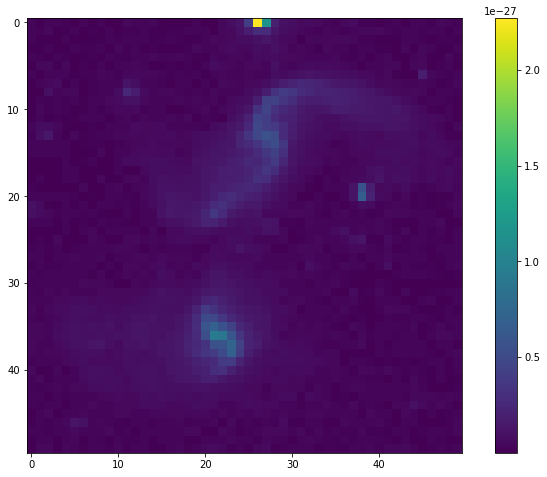

In [258]:
plt.figure(figsize=(12,8))
plt.imshow(sigma_image)
plt.colorbar()

In [259]:
np.max(white_image)

5.1593765e-26

In [267]:
chi_sq_best = (1/(white_image.shape[0]*white_image.shape[1]))*np.sum((white_image - best_image)**2/sigma_image**2)
chi_sq_disk = (1/(white_image.shape[0]*white_image.shape[1]))*np.sum((white_image - disk_image)**2/sigma_image**2)

In [268]:
ln_like_best = - chi_sq_best/2
ln_like_disk = - chi_sq_disk/2

In [269]:
print(f'The best image chi_sq = {chi_sq_best}')
print(f'The disk image chi_sq = {chi_sq_disk}')

The best image chi_sq = 17.763280958008178
The disk image chi_sq = 23.860267517264372


In [270]:
print(f'The best image ln_like = {ln_like_best}')
print(f'The disk image ln_like = {ln_like_disk}')

The best image ln_like = -8.881640479004089
The disk image ln_like = -11.930133758632186


In [271]:
print(4*np.pi - chi_sq_best/2)
print(4*np.pi - chi_sq_disk/2)

3.6847301353550836
0.6362368557269864


### Cutting out the Core

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


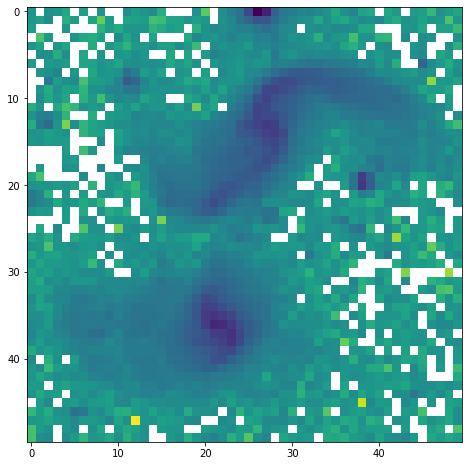

In [272]:
plt.figure(figsize = (12,8))
plt.imshow(-2.5*np.log10(white_image) - 48.6)

In [273]:
central_pixels = [[1.3449768597766645 , 2.420958347597996],[3.4969398354193277 , 1.8829676036873302]]

In [274]:
Resolution = 1.3449768597766645

In [275]:
central_pixel_prim = [int(15*central_pixels[0][0]/Resolution), int(15*central_pixels[0][1]/Resolution)]

In [276]:
central_pixel_sec = [int(15*central_pixels[1][0]/Resolution), int(15*central_pixels[1][1]/Resolution)]

In [277]:
central_pixel_prim

[15, 27]

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


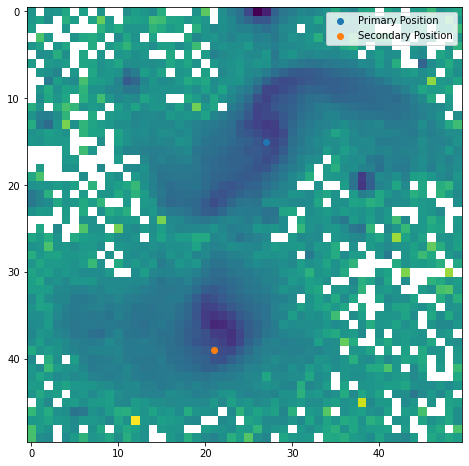

In [278]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(white_image) - 48.6)
plt.scatter(central_pixel_prim[1],central_pixel_prim[0])
plt.scatter(central_pixel_sec[1],central_pixel_sec[0])
plt.legend(['Primary Position','Secondary Position'])

In [279]:
mask = np.ones(white_image.shape)
mask[central_pixel_prim[0] - 3: central_pixel_prim[0] + 3, central_pixel_prim[1] - 3: central_pixel_prim[1] + 3] = 0
mask[central_pixel_sec[0] - 3: central_pixel_sec[0] + 3, central_pixel_sec[1] - 3: central_pixel_sec[1] + 3] = 0

In [280]:
masked_white_image = mask*white_image
masked_best_image = mask*best_image
masked_disk_image = mask*disk_image

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


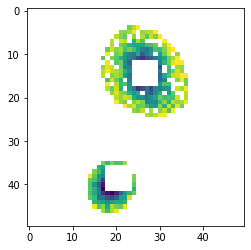

In [281]:
plt.figure()
plt.imshow(-2.5*np.log10(masked_disk_image) - 48.6)

In [282]:
masked_chi_sq_best = (1/(np.sum(mask)))*np.sum((masked_white_image - masked_best_image)**2/sigma_image**2)
masked_chi_sq_disk = (1/(np.sum(mask)))*np.sum((masked_white_image - masked_disk_image)**2/sigma_image**2)

In [283]:
masked_chi_sq_best

11.197445934974423

In [284]:
masked_chi_sq_disk

12.391677125487968

In [285]:
ln_like_best = 4*np.pi - (chi_sq_best/2 + masked_chi_sq_best/2)/2

In [286]:
ln_like_best

5.326188891113523

In [287]:
ln_like_disk = 4*np.pi - (chi_sq_disk/2 + masked_chi_sq_disk/2)/2

In [288]:
ln_like_disk

3.503384453671087

In [289]:
print(f'chi_sq_best = {chi_sq_best/2}')
print(f'masked_chi_sq_best = {masked_chi_sq_best/2}')
print(f'chi_sq_disk = {chi_sq_disk/2}')
print(f'masked_chi_sq_disk = {masked_chi_sq_disk/2}')

chi_sq_best = 8.881640479004089
masked_chi_sq_best = 5.598722967487212
chi_sq_disk = 11.930133758632186
masked_chi_sq_disk = 6.195838562743984


In [290]:
test_image_id = np.zeros(white_image.shape)
for i in range(white_image.shape[0]):
    for j in range(white_image.shape[1]):
        if white_image[i,j] >= 1.5e-28 and i > 2 and j > 2:
            test_image_id[i,j] += white_image[i,j]

In [291]:
np.max(test_image_id)

8.590029656468038e-27

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


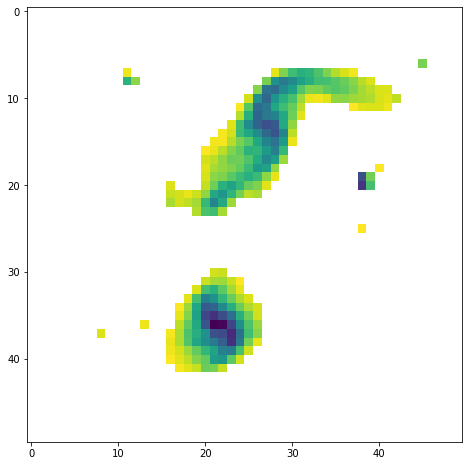

In [292]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(test_image_id) - 48.6)

In [293]:
chi_sq_id = (1/(white_image.shape[0]*white_image.shape[1]))*np.sum((white_image - test_image_id)**2/sigma_image**2)

In [294]:
masked_test_image_id = mask*test_image_id

In [295]:
masked_chi_sq_id = (1/(np.sum(mask)))*np.sum((white_image - masked_test_image_id)**2/sigma_image**2)

In [296]:
ln_like = (chi_sq_id/2 + masked_chi_sq_id/2)/2

In [297]:
ln_like

5.103635844244001

In [298]:
print(chi_sq_id)
print(masked_chi_sq_id)

9.85335164415041
10.561191732825593


## What does this Mean
So, even when we have the actual image itself but reduced to the number of active pixels of our simulation, we still get not the best fit. So...

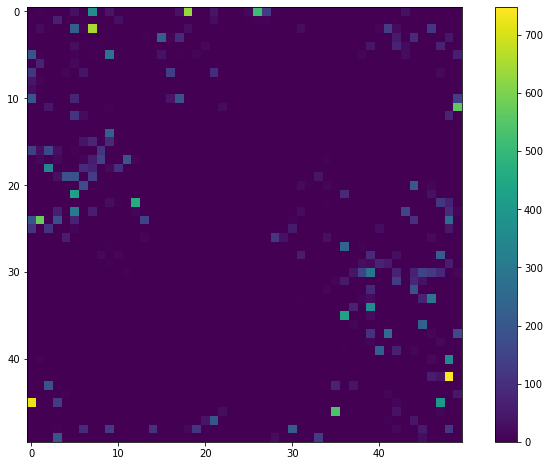

In [299]:
plt.figure(figsize=(12,8))
plt.imshow((white_image - test_image_id)**2/sigma_image**2)
plt.colorbar()

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


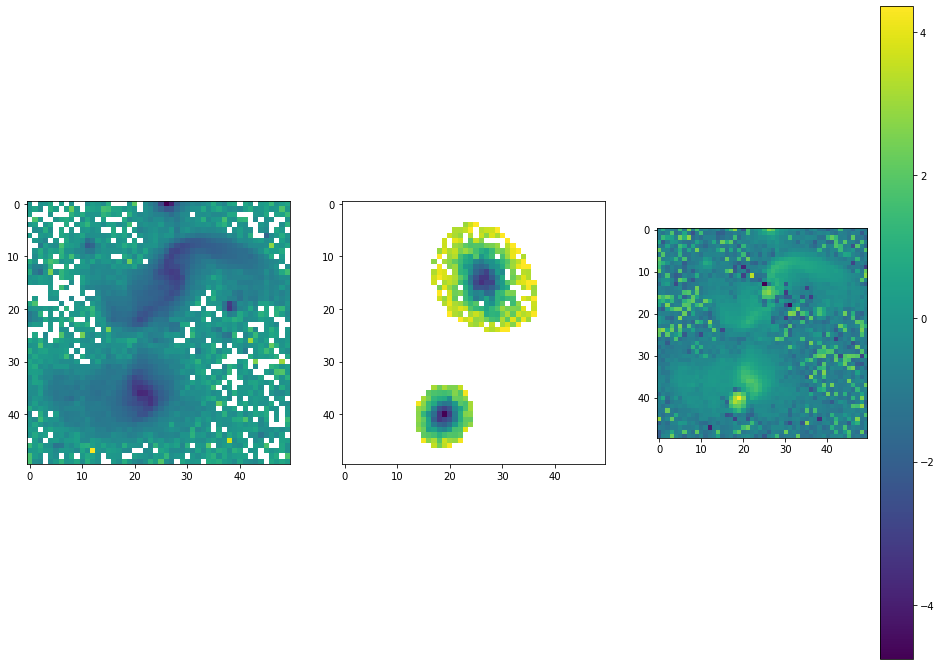

In [300]:
figure,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,12))
axes[0].imshow(-2.5*np.log10(white_image) - 48.6)
axes[1].imshow(-2.5*np.log10(disk_image) - 48.6)
axes[2].imshow(np.log10((white_image - disk_image)**2/sigma_image**2))
figure.colorbar(axes[2].imshow(np.log10((white_image - disk_image)**2/sigma_image**2)))

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


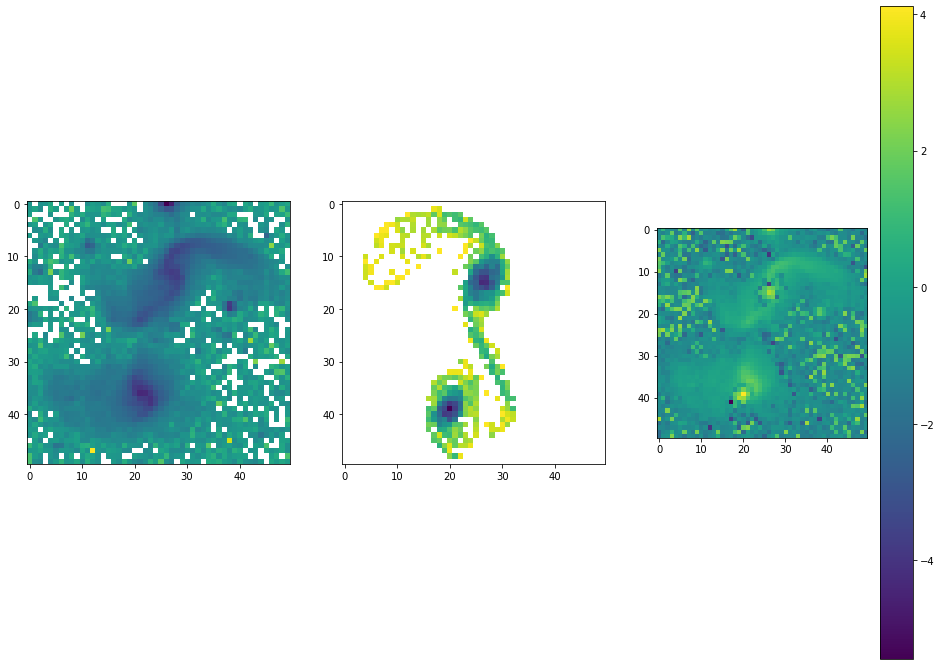

In [301]:
figure,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,12))
axes[0].imshow(-2.5*np.log10(white_image) - 48.6)
axes[1].imshow(-2.5*np.log10(best_image) - 48.6)
axes[2].imshow(np.log10((white_image - best_image)**2/sigma_image**2))
figure.colorbar(axes[2].imshow(np.log10((white_image - best_image)**2/sigma_image**2)))

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


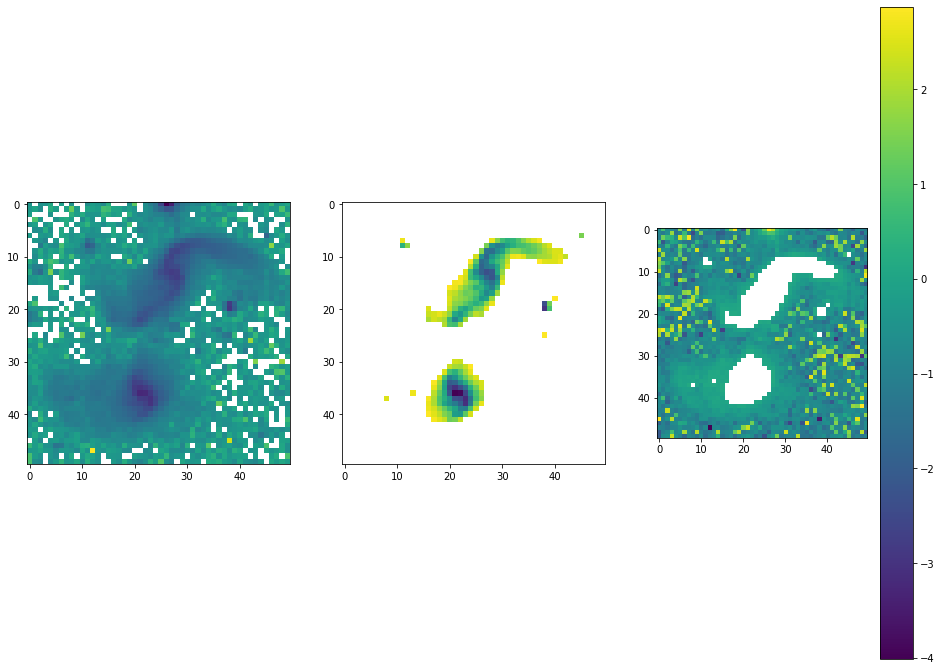

In [302]:
figure,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,12))
axes[0].imshow(-2.5*np.log10(white_image) - 48.6)
axes[1].imshow(-2.5*np.log10(test_image_id) - 48.6)
axes[2].imshow(np.log10((white_image - test_image_id)**2/sigma_image**2))
figure.colorbar(axes[2].imshow(np.log10((white_image - test_image_id)**2/sigma_image**2)))

### Comparing Active Pixels

In [303]:
mask_active = best_image > 0

In [304]:
mask_active

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [305]:
active_chi_sq_best = (1/(np.sum(mask_active)))*np.sum((white_image[mask_active] - best_image[mask_active])**2/sigma_image[mask_active]**2)

In [306]:
active_chi_sq_best

47.746329758032026

In [307]:
mask_active = disk_image > 0

In [308]:
active_chi_sq_disk = (1/(np.sum(mask_active)))*np.sum((white_image[mask_active] - disk_image[mask_active])**2/sigma_image[mask_active]**2)

In [309]:
active_chi_sq_disk

90.57420524695783

In [310]:
ln_like_best_act = (chi_sq_best/2 + active_chi_sq_best/2)/2
ln_like_disk_act = (chi_sq_disk/2 + active_chi_sq_disk/2)/2
print(ln_like_best_act)
print(ln_like_disk_act)

16.37740267901005
28.60861819105555


### Cutting Out Stars

In [455]:
from astropy.stats import sigma_clip, mad_std

In [461]:
clipping_test = white_image.copy()

In [462]:
clipping_test_AB = -2.5*np.log10(clipping_test) - 48.6

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [463]:
clipping_test_AB[np.isnan(clipping_test_AB)] = np.max(clipping_test_AB[~np.isnan(clipping_test_AB)])

In [464]:
clipping_test[clipping_test_AB < 16.5] = 1e-30

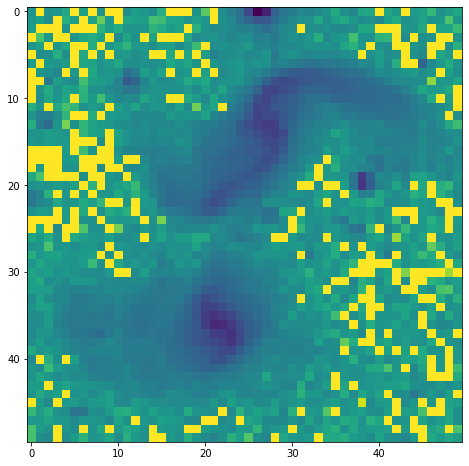

In [465]:
plt.figure(figsize=(12,8))
plt.imshow(clipping_test_AB)

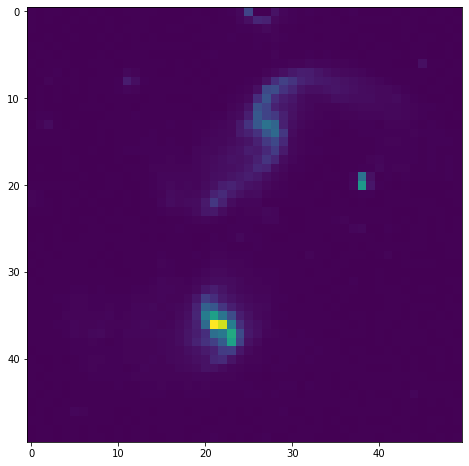

In [466]:
plt.figure(figsize=(12,8))
plt.imshow(clipping_test)